In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('Diesel.csv')
#df = pd.read_csv('Gasoline.csv')
df

2024-01-02 14:28:16.259889: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 14:28:16.295718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 14:28:16.295762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 14:28:16.295783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 14:28:16.301616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 14:28:16.302400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

,Tanggal,qty,Jumlah
0,2016-01-01,836,5600932.0
1,2016-01-02,964,6460341.0
2,2016-01-03,1900,12727990.0
3,2016-01-04,1944,13023929.0
4,2016-01-05,7653,43238490.0
...,...,...,...
2083,2021-12-27,3892,20043800.0
2084,2021-12-28,3848,19817200.0
2085,2021-12-29,3915,20162250.0
2086,2021-12-30,2715,13982250.0


Text(0.5, 0, 'Date')

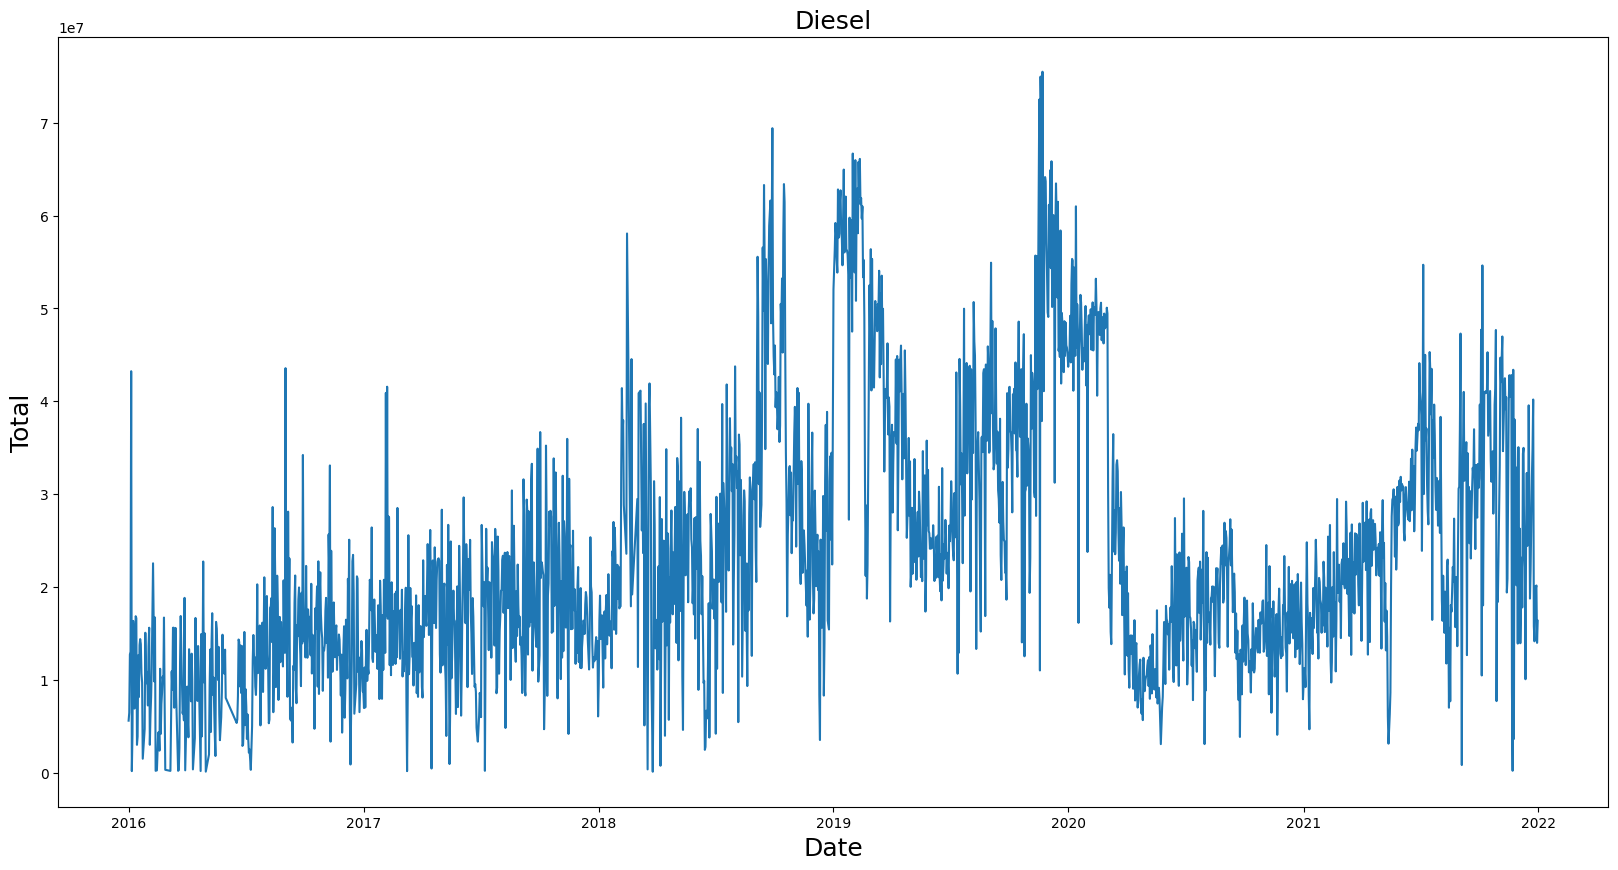

In [2]:
# Mengatur Tanggal dan Data
df['Tanggal'] = pd.to_datetime(df.Tanggal, format='%Y-%m-%d')
df.index = df['Tanggal']

#Plot
plt.figure(figsize=(20,10))
plt.plot(df['Jumlah'],label='History Harga Penutup')
plt.title('Diesel', fontsize=18)
plt.ylabel('Total',fontsize=18)
plt.xlabel('Date',fontsize=18)

In [3]:
#Membuat Matrix 2 Dimensi
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Tanggal','Jumlah'])
for i in range(0,len(df)):
    new_data['Tanggal'][i] = data['Tanggal'][i]
    new_data['Jumlah'][i] = data['Jumlah'][i]
    
#Membuat Tanggal menjadi Index di variable new_data
new_data.index = new_data['Tanggal']
new_data.drop('Tanggal',axis=1,inplace=True)

#Membuat Data Latih dan Test
#Menampung Data Untuk dijadikan Data olah
dataset = new_data.values 
#Membuat data latih
train = dataset[0:1670,:]
#Membuat Data Uji
valid = dataset[1670:,:]
 
    

/tmp/ipykernel_221981/585245062.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Tanggal'][i] = data['Tanggal'][i]
/tmp/ipykernel_221981/585245062.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Jumlah'][i] = data['Jumlah'][i]


In [4]:
#Normalisasi Data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

x_train,y_train = [],[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

print(x_train)


[[[0.07292572]
  [0.0843251 ]
  [0.16746051]
  ...
  [0.20574941]
  [0.09141895]
  [0.11888773]]

 [[0.0843251 ]
  [0.16746051]
  [0.1713859 ]
  ...
  [0.09141895]
  [0.11888773]
  [0.20539868]]

 [[0.16746051]
  [0.1713859 ]
  [0.57215816]
  ...
  [0.11888773]
  [0.20539868]
  [0.10719366]]

 ...

 [[0.24161486]
  [0.248241  ]
  [0.35569369]
  ...
  [0.16995696]
  [0.22761118]
  [0.21162648]]

 [[0.248241  ]
  [0.35569369]
  [0.29476057]
  ...
  [0.22761118]
  [0.21162648]
  [0.21476877]]

 [[0.35569369]
  [0.29476057]
  [0.34380764]
  ...
  [0.21162648]
  [0.21476877]
  [0.24318601]]]


In [5]:
# Membuat Model dan fit LSTM Network
import time
mulai = time.time()

model = Sequential()
model.add(LSTM(units=60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=5,batch_size=2,verbose=1,validation_data=(x_train, y_train))

Epoch 1/5
805/805 [==============================] - 20s 22ms/step - loss: 0.0153 - val_loss: 0.0122
Epoch 2/5
805/805 [==============================] - 17s 21ms/step - loss: 0.0129 - val_loss: 0.0107
Epoch 3/5
805/805 [==============================] - 17s 21ms/step - loss: 0.0123 - val_loss: 0.0104
Epoch 4/5
805/805 [==============================] - 17s 21ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 5/5
805/805 [==============================] - 17s 21ms/step - loss: 0.0121 - val_loss: 0.0126


In [6]:
#Prediksi 246 Values dengan 60 Data Train
inputs = new_data[len(new_data)-len(valid)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

14/14 [==============================] - 1s 9ms/step


In [7]:
rmse = np.sqrt(np.mean((valid - closing_price)**2))
mape = np.mean(np.abs((valid - closing_price) / closing_price)) * 100

RMSE : 7808088.56
MAPE : 27.88 %
Program run in = 1.49 min


/tmp/ipykernel_221981/2080093279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


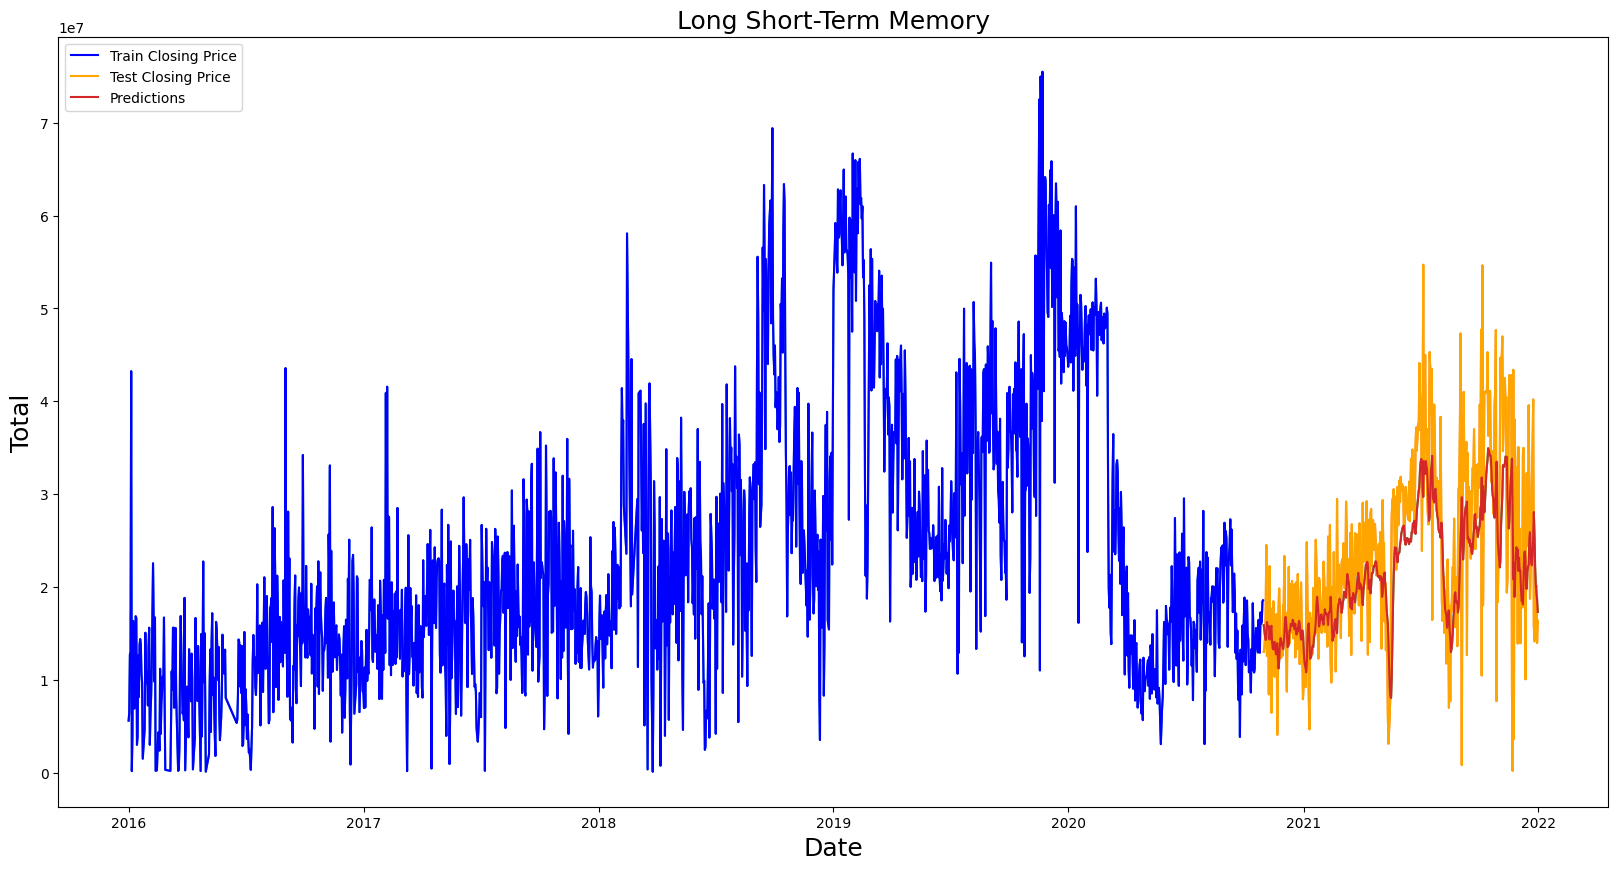

In [8]:
#Chart Grafik
train = new_data[:1670]
valid = new_data[1670:]

valid['Predictions'] = closing_price
plt.title('Long Short-Term Memory',fontsize=18)
plt.plot(train['Jumlah'])
plt.plot(valid['Jumlah'])
plt.plot(valid['Predictions'])

plt.plot(train['Jumlah'], label = 'Train Closing Price',color='blue')
plt.plot(valid['Jumlah'], label = 'Test Closing Price',color='orange')
plt.plot(valid['Predictions'], label = 'Predictions')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)
# plt.plot(df['Jumlah'],alpha = 0.5, label='Jumlah')
# plt.plot(df['SMA20'],alpha = 0.5, label='SMA20')
# plt.plot(df['SMA50'],alpha = 0.5, label='SMA50')
akhir = time.time()
waktu_detik = akhir - mulai
waktu_menit = "{:.2f}".format(waktu_detik / 60)

print("RMSE :","{:.2f}".format(rmse))
print("MAPE :","{:.2f}".format(mape),"%")


print(f"Program run in = {waktu_menit} min")

Text(0, 0.5, 'Total')

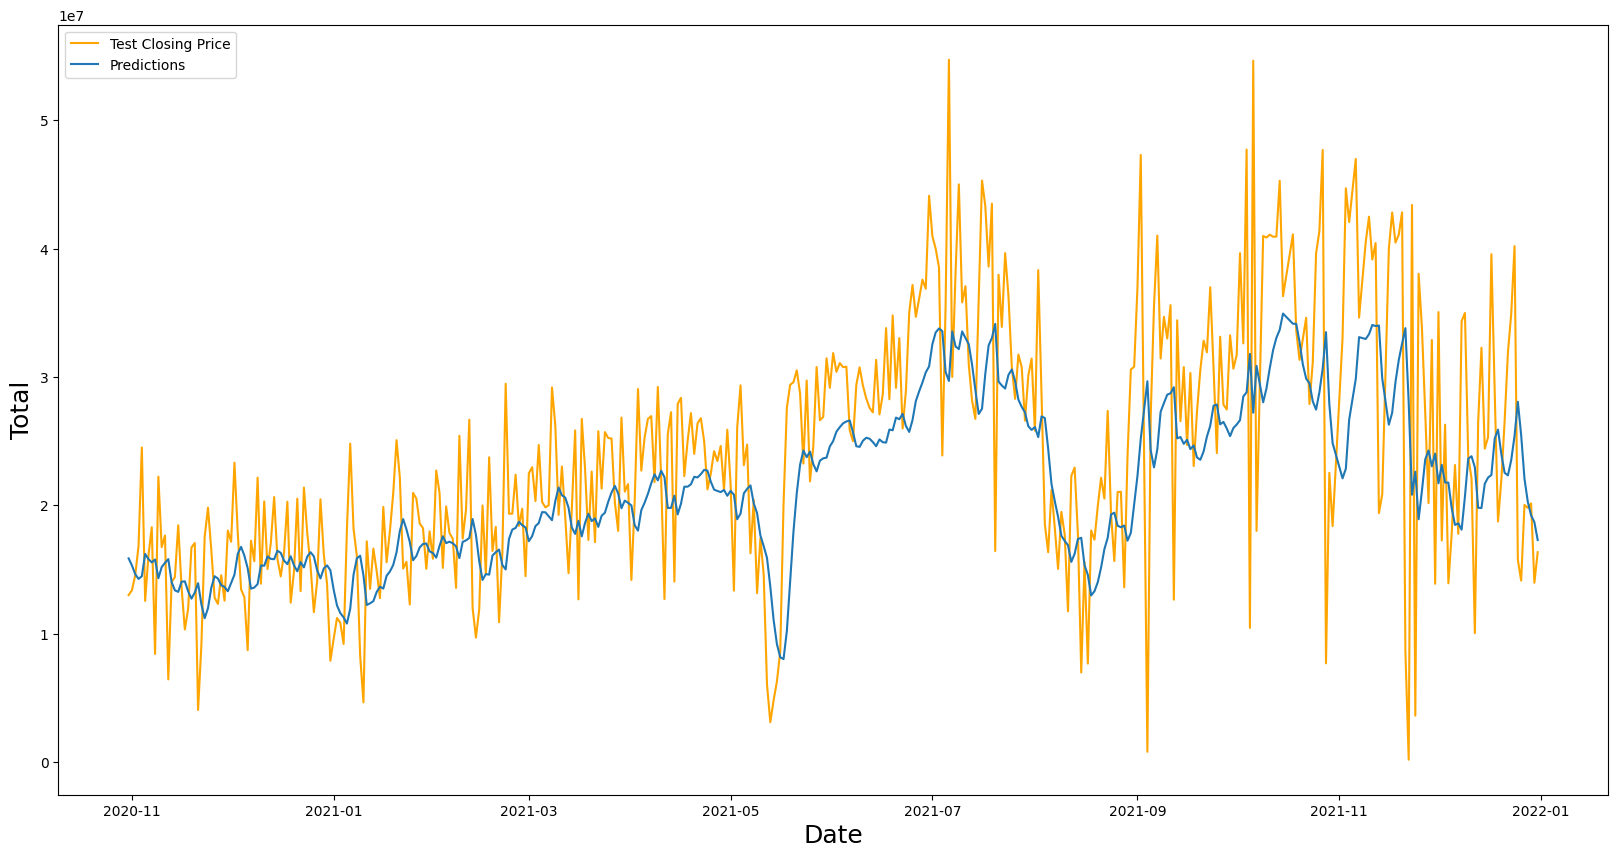

In [9]:
plt.plot(valid['Jumlah'], label = 'Test Closing Price',color='orange')
plt.plot(valid['Predictions'], label = 'Predictions')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)